In [ ]:
"""author: Vetivert? 💐 
created: 17/06/2025 @ 14:46:26"""

'author: Vetivert? 💐 \ncreated: 17/06/2025 @ 14:46:26'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, make_scorer, ConfusionMatrixDisplay

import sys
import os

current_dir = os.path.abspath('')

parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from src.utils.prefix_path import *
# from src.utils.models import *
from src.utils.functions import *

In [3]:
RF_full_pred = np.array([1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 
 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 
 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 
 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 
 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,])

RF_full_test = np.array([1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,  
 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 
 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 
 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 
 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2,])

In [4]:
RF_pred = np.array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

RF_test = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0])

In [ ]:
SA_test = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
 0, 1, 0, 0, 0,])

SA_pred = ([0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,0,1,
 1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0])

In [ ]:
SSA_test = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
                 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
                 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

SSA_pred = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0,   
                 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
                 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
SSA_full_pred = np.array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0])

SSA_full_test = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0])

In [ ]:
xgb_pred = np.array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

xgb_test = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0])

In [ ]:
lgbm_test = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0])

lgbm_pred = np.array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
et_pred = np.array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

et_test = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0])

In [5]:
y_true = RF_full_test
y_pred = RF_full_pred

In [11]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.82      0.83       104
           2       0.76      0.79      0.77        75

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179



In [9]:
class_names = ['Dengue Fever','Severe Dengue Fever']
cm = confusion_matrix(y_true, y_pred)
    
# Calculate overall metrics
accuracy = accuracy_score(y_true, y_pred)

# Calculate per-class metrics
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# roc_auc_score(y_true, y_prob)
# Set class names
if class_names is None:
    class_names = [f'Class {i}' for i in range(len(cm))]

print(f"Accuracy: {accuracy:.2f}")
print("Precision:", precision)  
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.80
Precision: [0.84158416 0.75641026]
Recall: [0.81730769 0.78666667]
F1 Score: [0.82926829 0.77124183]


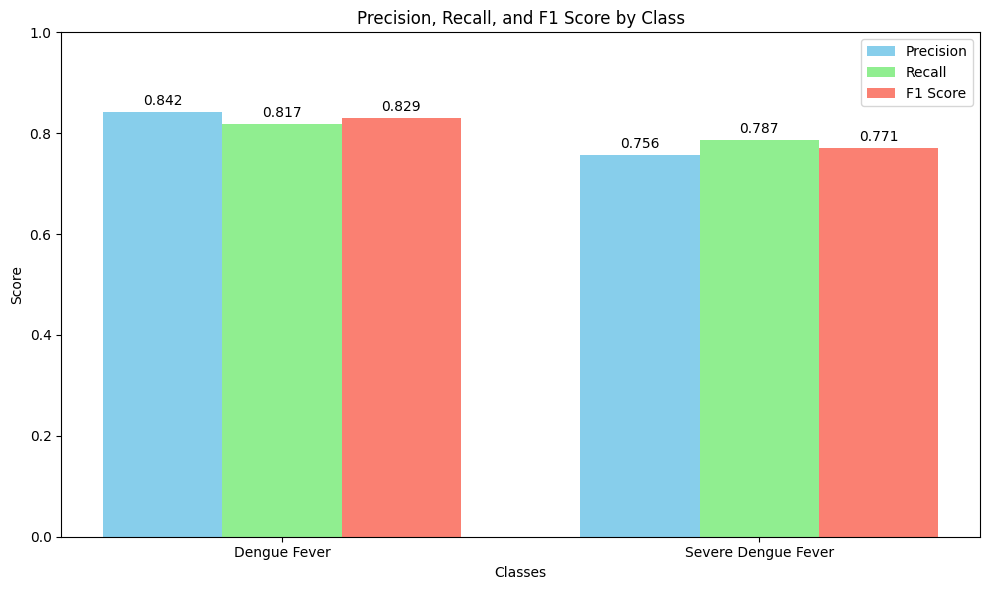

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a bar plot for precision, recall, and F1 score by class
metrics_data = {
    'Precision': precision,
    'Recall': recall, 
    'F1 Score': f1
}

x = np.arange(len(class_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
bars1 = ax.bar(x - width, precision, width, label='Precision', color='skyred')
bars2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
bars3 = ax.bar(x + width, f1, width, label='F1 Score', color='salmon')

# Add labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

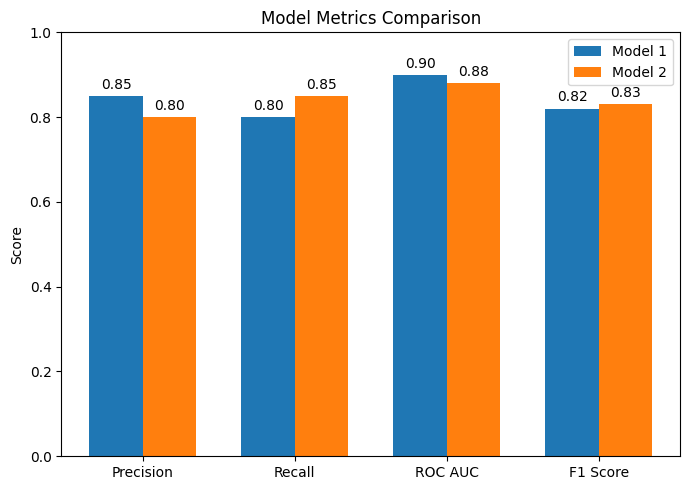

In [ ]:
metrics = ['Precision', 'Recall', 'ROC AUC', 'F1 Score']
model1_scores = [0.85, 0.80, 0.90, 0.82]
model2_scores = [0.80, 0.85, 0.88, 0.83]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, model1_scores, width, label='Model 1')
bars2 = ax.bar(x + width/2, model2_scores, width, label='Model 2')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Model Metrics Comparison')
ax.legend()

# Annotate bars with scores
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

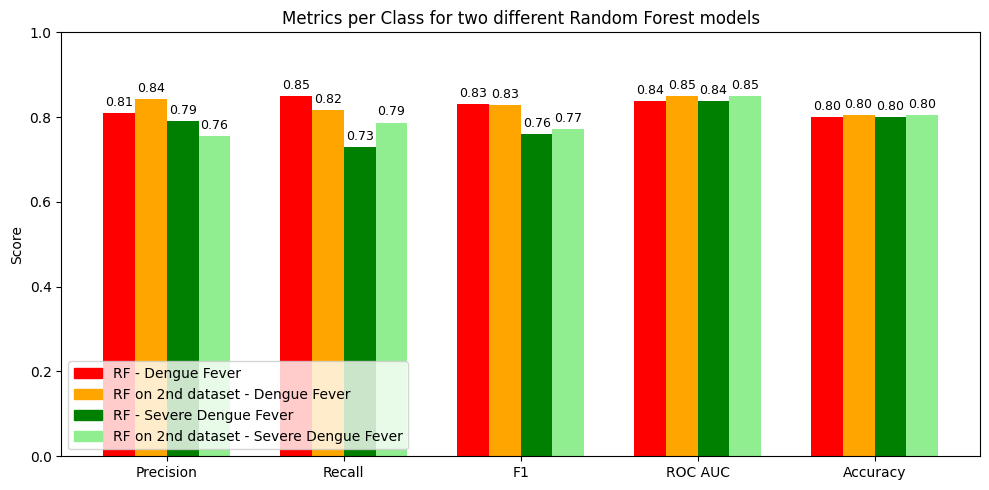

In [36]:
import matplotlib.patches as mpatches

metrics = ['Precision', 'Recall', 'F1', 'ROC AUC', 'Accuracy']
classes = ['Class 0', 'Class 1']

# Model 1: [class0_metrics, class1_metrics]
model1 = [
    [0.81, 0.85, 0.83, 0.8375, 0.8],  # Class 00.81      0.85      0.83
    [0.79, 0.73, 0.76, 0.8375, 0.8]   # Class 10.79      0.73      0.76
]
# Model 2: [class0_metrics, class1_metrics]
model2 = [
    [0.842, 0.817, 0.829, 0.85, 0.8045],  # Class 0
    [0.756, 0.787, 0.771, 0.85, 0.8045]   # Class 1
]

x = np.arange(len(metrics))
width = 0.18

fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars with specified colors
bars1_c0 = ax.bar(x - width, model1[0], width, color='red')
bars2_c0 = ax.bar(x,        model2[0], width, color='orange')
bars1_c1 = ax.bar(x + width, model1[1], width, color='green')
bars2_c1 = ax.bar(x + 2*width, model2[1], width, color='lightgreen')

ax.set_xticks(x + width/2)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Metrics per Class for two different Random Forest models')

# Custom legend handles
legend_handles = [
    mpatches.Patch(color='red', label='RF - Dengue Fever'),
    mpatches.Patch(color='orange', label='RF on 2nd dataset - Dengue Fever'),
    mpatches.Patch(color='green', label='RF - Severe Dengue Fever'),
    mpatches.Patch(color='lightgreen', label='RF on 2nd dataset - Severe Dengue Fever'),
]
ax.legend(handles=legend_handles)

# Annotate bars
for bars in [bars1_c0, bars2_c0, bars1_c1, bars2_c1]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

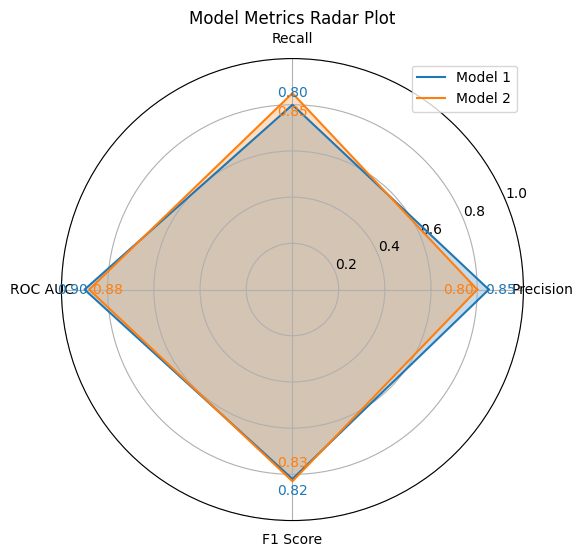

In [25]:
metrics = ['Precision', 'Recall', 'ROC AUC', 'F1 Score']
model1_scores = [0.85, 0.80, 0.90, 0.82]
model2_scores = [0.80, 0.85, 0.88, 0.83]

labels = np.array(metrics)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
scores1 = model1_scores + [model1_scores[0]]
scores2 = model2_scores + [model2_scores[0]]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, scores1, label='Model 1')
ax.fill(angles, scores1, alpha=0.25)
ax.plot(angles, scores2, label='Model 2')
ax.fill(angles, scores2, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_ylim(0, 1)
plt.title('Model Metrics Radar Plot')
plt.legend()

# Annotate each point with its score
for i, (angle, score) in enumerate(zip(angles, scores1)):
    if i < num_vars:
        ax.text(angle, score + 0.05, f"{score:.2f}", color='C0', ha='center', va='center', fontsize=10)
for i, (angle, score) in enumerate(zip(angles, scores2)):
    if i < num_vars:
        ax.text(angle, score - 0.08, f"{score:.2f}", color='C1', ha='center', va='center', fontsize=10)

plt.show()